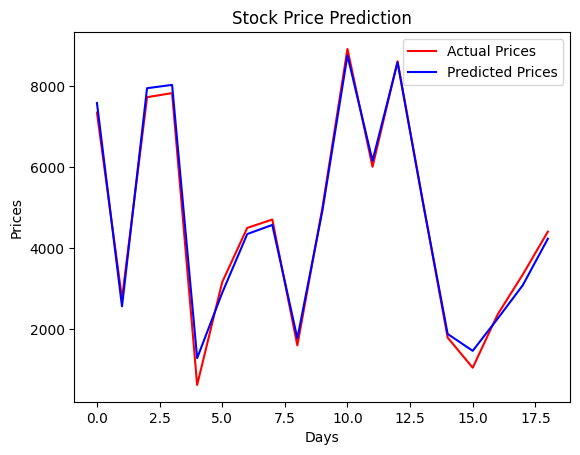

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate sample stock price data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100)
prices = np.random.normal(loc=100, scale=10, size=len(dates)).cumsum()  # Simulated stock prices

data = pd.DataFrame(data={'Date': dates, 'Close': prices})
data.set_index('Date', inplace=True)

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create feature and target datasets
X, y = [], []
look_back = 5  # Use previous 5 days to predict the next
for i in range(len(prices_scaled) - look_back):
    X.append(prices_scaled[i:i + look_back])
    y.append(prices_scaled[i + look_back])
X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP Model
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
input_neurons = X_train.shape[1]
hidden_neurons = 10
output_neurons = 1

weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training the MLP
learning_rate = 0.1
epochs = 5000

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train.reshape(-1, input_neurons), weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y_train.reshape(-1, 1) - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X_train.reshape(-1, input_neurons).T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Predictions
predicted_prices = sigmoid(np.dot(sigmoid(np.dot(X_test.reshape(-1, input_neurons), weights_input_hidden) + bias_hidden), weights_hidden_output) + bias_output)

# Inverse scaling to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(predicted_prices, color='blue', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate synthetic credit scoring data
np.random.seed(42)
num_samples = 1000
data = pd.DataFrame({
    'income': np.random.normal(50000, 15000, num_samples),  # Income feature
    'debt_to_income_ratio': np.random.uniform(0, 1, num_samples),  # Debt-to-Income ratio
    'credit_history': np.random.randint(0, 2, num_samples),  # 0: Bad history, 1: Good history
    'default': np.random.randint(0, 2, num_samples)  # Default (0 or 1)
})

# Features and target
X = data.drop('default', axis=1)
y = data['default']

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP Model
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

input_neurons = X_train.shape[1]
hidden_neurons = 10
output_neurons = 1

weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training the MLP
learning_rate = 0.1
epochs = 5000

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y_train.values.reshape(-1, 1) - predicted_output  # Convert Series to NumPy array
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Predictions on the test set
hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_activation_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_activation_test, weights_hidden_output) + bias_output
predicted_output_test = sigmoid(output_layer_input_test)

# Convert to class predictions
predicted_classes = np.round(predicted_output_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 50.50%
